# Exercice 1 : Préparation du document d'annotation manuelle

In [1]:
import glob
import re
import spacy
import csv



In [2]:
def read_text(path_corpora):
        with open (path_corpora, "r", encoding="utf-8") as fichier:
            txt=fichier.read()
        return txt
nlp = spacy.load("fr_core_news_lg")

In [4]:
path_corpus="../corpus-REN_2023-2024/*/*.txt"
for path_file in glob.glob(path_corpus):
    liste_tok=[]#initialise une liste pour stocker les tokens
    print(path_file)
    filename=path_file.split("/")[-1]#quelle est la solution pour 
    # récupérer le nom du fichier ?
    texte=read_text(path_file)
    for ponctuation in ["\n","  ","\t"]:#On peut ajouter d'autres 
    # ponctuations
        texte=re.sub(ponctuation,"$",texte) 
   
    doc = nlp(texte)
    liste_tok=[]
    with open(f'../corpus-REN_2023-2024_output/{filename}_annot.csv', 'a', newline='') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter=';',quotechar='\t', quoting=csv.QUOTE_MINIMAL)
            spamwriter.writerow(["Token","LOC","PER","ORG","MISC"])
            for token in doc:
            #     print(token.text)
                    if token.text !="$":
                        liste_tok.append(token.text)
                        spamwriter.writerow([token.text])           

    print(filename," : ",len(liste_tok))

../corpus-REN_2023-2024/NOAILLES/NOAILLES_la-nouvelle-esperance.txt
NOAILLES_la-nouvelle-esperance.txt  :  66089
../corpus-REN_2023-2024/AIMARD_RIVIERE/AIMARD_belle-riviere.txt
AIMARD_belle-riviere.txt  :  170907
../corpus-REN_2023-2024/FLAUBERT/FLAUBERT_education-sentimentale.txt
FLAUBERT_education-sentimentale.txt  :  183487


# Exercice 2 : Annotation avec spaCy

In [40]:
import pandas as pd
import json

In [41]:
#stockage des données dans un format json pour une réutilisation des données
def stocker(chemin, contenu):
    w =open(chemin, "w")
    w.write(json.dumps(contenu , indent = 2))
    w.close()
    # print(chemin)
    
    return chemin

In [42]:
path="../corpus-REN_2023-2024/AIMARD_RIVIERE/AIMARD_belle-riviere.txt"
text=read_text(path)

In [43]:
# chargement du modèle de langue de spaCy avec lequel vous souhaitez travailler
#Vous pouvez changer le modèle de langue : 0="fr_core_news_lg", 1="fr_core_news_md", 2="fr_core_news_sm"

modele_langfr=["fr_core_news_lg","fr_core_news_sm"]
modele=modele_langfr[1] 
nlp = spacy.load(modele) 

## displaCy

In [6]:
# Importer le visualiseur Displacy de Spacy
from spacy import displacy




doc =  nlp(text[:520])
displacy.serve(doc,style="ent")

/home/obtic2023/anaconda3/lib/python3.9/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Pour annoter les 5000 premiers tokens uniquement 

In [63]:

liste_tok=[]
ponctuations=[".",",","!","?",":",";"]
for token in doc:
    liste_tok.append(token.text)

for tok in liste_tok[:5000]:
#     if tok == "." or tok=="," or tok=="!" or tok=="?" or tok==":" or tok==";":
    fichier = open("../corpus-REN_2023-2024/AIMARD_RIVIERE/AIMARD_belle-riviere_5000.txt", "a")
    fichier.write(tok+" ")
#     else:
#         fichier = open("../corpus-REN_2023-2024/AIMARD_RIVIERE/AIMARD_belle-riviere_5000.txt", "a")
#         fichier.write(" "+tok)
        
# text_5000=    
#     fichier = open("../corpus-REN_2023-2024/AIMARD_RIVIERE/AIMARD_belle-riviere_5000.txt", "a")
#     fichier.write(token.text)

    

    
    

## REN avec spaCy

In [64]:
import time

start = time.time()
dico_en={}
path_5000="../ressources/ressources_TD8/DAUDET/DAUDET_TesseractFra-PNG/*.txt"
text_5000=read_text(path_5000)
doc =  nlp(text_5000)
i=0

for ent in doc.ents:
    n_ent="Entité_"+str(i)
    dico_en[n_ent]={}
    dico_en[n_ent]["entité"]=ent.text
    dico_en[n_ent]["label"]=ent.label_

    i=i+1

    


end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}ms')
print(dico_en)
stocker(f"../../ressources/ressources_TD8/DAUDET/DAUDET_TesseractFra-PNG/DAUDET_petit-chose_TesseractFra-PNG.txt_{modele}.json",dico_en)

Temps d'exécution : 2.8ms
{'Entité_0': {'entité': 'Première', 'label': 'MISC'}, 'Entité_1': {'entité': 'Le Fort Duquesne \n I', 'label': 'MISC'}, 'Entité_2': {'entité': 'comte de Jumonville \n ', 'label': 'PER'}, 'Entité_3': {'entité': 'Louis XIV', 'label': 'PER'}, 'Entité_4': {'entité': 'Louis XV', 'label': 'PER'}, 'Entité_5': {'entité': 'Amérique du Nord', 'label': 'LOC'}, 'Entité_6': {'entité': 'la France', 'label': 'LOC'}, 'Entité_7': {'entité': 'Canada', 'label': 'LOC'}, 'Entité_8': {'entité': 'Anglais', 'label': 'LOC'}, 'Entité_9': {'entité': 'Angleterre', 'label': 'LOC'}, 'Entité_10': {'entité': 'Mississipiens', 'label': 'LOC'}, 'Entité_11': {'entité': 'Voltaire', 'label': 'PER'}, 'Entité_12': {'entité': 'la France', 'label': 'LOC'}, 'Entité_13': {'entité': 'Canada', 'label': 'LOC'}, 'Entité_14': {'entité': 'Européens', 'label': 'LOC'}, 'Entité_15': {'entité': 'Indiens', 'label': 'LOC'}, 'Entité_16': {'entité': "baie d' Hudson", 'label': 'LOC'}, 'Entité_17': {'entité': 'golfe du

'../corpus-REN_2023-2024/AIMARD_RIVIERE/AIMARD_belle-riviere_fr_core_news_sm.json'

# Évaluation

## Diagramme de Venn

In [3]:
import re, glob, json
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import pandas as pd

#Lire les fichiers json 
def read_json (chemin):
    with open(chemin) as json_data: 
        data =json.load(json_data)
    return data

# Les fonctions suivantes ne sont pas utilisées dans le programme, mais pourraient être adaptées pour calculer et produire les diagrammes de Venn
    
# #calcul des diagrammes de Venn
# def diagramme_venn(liste_en_pp, liste_en_ocr,ocr):
#     font2 = {'size': 25} # use for labels
#     plt.rc('font', **font2) # sets the default font 
#     plt.rcParams['text.color'] = 'black' # changes default text colour
#     venn2([set(liste_en_pp), set(liste_en_ocr)],set_labels = ('EN Réf', 'EN %s'%ocr),set_colors=("darkgrey", "darkblue"),alpha=0.5)

#     venn2_circles(subsets=(set(liste_en_pp), set(liste_en_ocr)),linestyle="dotted", linewidth=1) 
#     print(f"Analyse de la version {ocr}")     

# #stockage des diagrammes de Venn au format png
# def stocker_png(nom_fichier):
#     plt.gcf().set_size_inches(12, 7)
#     plt.subplots_adjust(left=0.03, right=0.8, top=0.9, bottom=0.1)
#     plt.savefig(nom_fichier, dpi=300)
#     plt.gcf()
#    # plt.clf()
#     return nom_fichier
 
    




In [4]:
#Récupérer les données dans le csv pour les mettres au format adéquat set
df = pd.read_csv('../corpus-REN_2023-2024_output/AIMARD_RIVIERE/AIMARD_belle-riviere.txt_annot.csv',sep=";",on_bad_lines='skip')
display(df[:100]) 
data_VT=set()

data_loc=df.query("LOC=='X'")
data_per=df.query("PER=='X'" )
data_misc=df.query("MISC=='X'" )
data_org=df.query("ORG=='X'" )
liste_loc=list(data_loc.Token)
# print(liste_loc)
liste_per=list(data_per.Token)
liste_misc=list(data_misc.Token)
liste_org=list(data_org.Token)
data_VT.update(liste_per+liste_org+liste_loc+liste_misc)
print(data_VT)
    

,Token,LOC,PER,ORG,MISC
0,Première,NaN,NaN,NaN,NaN
1,partie,NaN,NaN,NaN,NaN
2,--,NaN,NaN,NaN,NaN
3,Le,X,NaN,NaN,NaN
4,Fort,X,NaN,NaN,NaN
...,...,...,...,...,...
95,si,NaN,NaN,NaN,NaN
96,l',NaN,NaN,NaN,NaN
97,on,NaN,NaN,NaN,NaN
98,cherche,NaN,NaN,NaN,NaN


{'Orléans', 'de', 'Virginie', 'Le', 'XV', 'Mexique', 'Canada', 'le', "d'", 'Hudson', 'Nord', 'Ohio', 'comte', 'Ferney', 'Fort', 'Duquesne', 'Marine', 'Louis', 'Royal', 'baie', 'du', 'France', 'Angleterre', 'Amérique', 'Voltaire', 'Nouvelle', '-', "L'", 'XIV', 'golfe', 'Jumonville', 'la', 'Belle-Rivière', "l'"}


sm.json
{'Un parlementaire', 'Capitaine \xa0  !', 'Ça', 'Anglais', 'Nous sommes dans les mains', 'Ferney', 'Washington', 'Première', 'comte de Jumonville', 'États-Unis', 'Es - tu fou', 'Baste', 'Dis', 'Capitaine', 'Amérique du Nord', 'Où va Sans-Piste', 'Tes ancêtres', 'Dieu', 'Aucun', 'Tels', 'golfe du Mexique', 'apprendrez', 'comte de Jumonville \n ', 'brave Berger', 'Crois - tu \xa0  ', "baie d ' Hudson", "Rêve d' enfant \xa0 !", 'Berger', 'En somme', 'Grognon \xa0  !', 'Européens', 'Le Fort Duquesne \n I', 'Dinwidie', 'Europe', 'Angleterre', 'I', 'Bois-Brûlés', 'Berger \xa0  !', 'Grognon', 'M. de Contrecœur', 'Normands', 'fort Duquesne', 'la France', 'Nous avons le temps', 'Va', 'Baste \xa0  !', 'Louis XIV', 'Pittsbourg', 'Hein', 'Respecte', 'Canadien', 'Canadiens', 'Amérique', 'Québec', 'Voyons', 'Jumonville', 'Jugeant', 'Parle', 'Indiens', 'Virginie', 'M. de Jumonville', 'Contrecœur', 'Votre père', 'Louis XV', 'Canada', 'Ah \xa0 !', 'Ohio', 'Sans-Piste', 'À quoi bon', 'Mississipi

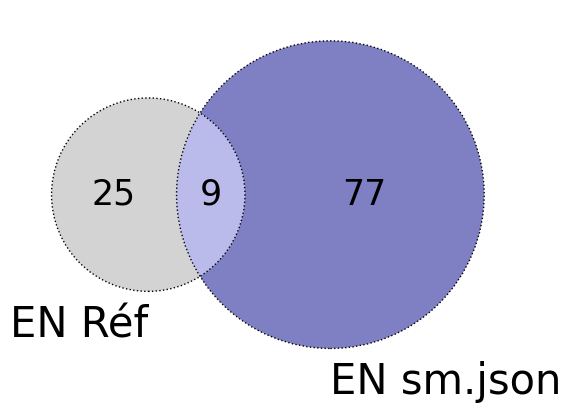

lg.json
{'Un parlementaire', 'Capitaine \xa0  !', 'Ça', 'Nouvelle - France', 'Anglais', 'Nous sommes dans les mains', 'Ferney', 'Est', 'Washington', 'Première', 'comte de Jumonville', 'États-Unis', 'Es - tu fou', 'Baste', 'Dis', 'Capitaine', 'Amérique du Nord', 'Où va Sans-Piste', 'Tes ancêtres', 'Dieu', 'Aucun', 'Tels', 'golfe du Mexique', 'apprendrez', 'comte de Jumonville \n ', 'brave Berger', 'Crois - tu \xa0  ', "baie d ' Hudson", "Rêve d' enfant \xa0 !", 'Berger', 'En somme', 'Grognon \xa0  !', 'Nouvelle - Orléans', 'Européens', 'Le Fort Duquesne \n I', 'le Peau', 'Dinwidie', 'Europe', 'Angleterre', 'Capitaine \xa0 !', 'I', 'Bois-Brûlés', 'Berger \xa0  !', 'Grognon', 'M. de Contrecœur', 'Normands', 'fort Duquesne', 'la France', 'Nous avons le temps', 'bon Berger', 'Michel - Ange', 'Va', 'Baste \xa0  !', 'Louis XIV', 'Pittsbourg', 'Hein', 'Respecte', 'Canadien', 'Canadiens', 'Amérique', 'Québec', 'Voyons', 'comtes de Jumonville', 'Jumonville', 'Agis', 'Jugeant', 'Parle', 'Indiens'

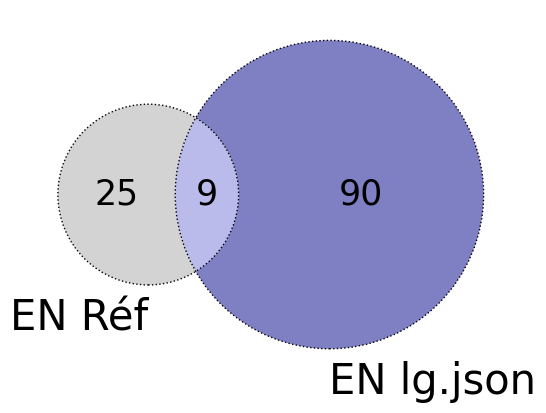

In [5]:
#Stockage dans une liste des données récupérées depuis le dictionnaire stocké dans le fichier .json  

liste_vers=[]
liste_entite=[]
path_data= "../corpus-REN_2023-2024_output/AIMARD_RIVIERE/*.json"
for path in glob.glob(path_data):
    data=read_json(path)
    
    vers=path.split("/")[3]
    vers=vers.split("_")[-1]
    print(vers)
    
    for k, ssdic in data.items():
#         print(ssdic)
        for meta, val in ssdic.items():
#             print(meta)
            if meta=="entité":
#                 print(val)
                liste_entite.append(val)
    print(set(liste_entite))
    font2 = {'size': 25} # use for labels
    plt.rc('font', **font2) # sets the default font 
    plt.rcParams['text.color'] = 'black' # changes default text colour
    venn2([data_VT, set(liste_entite)],set_labels = ('EN Réf', 'EN %s'%vers),set_colors=("darkgrey", "darkblue"),alpha=0.5)

    venn2_circles(subsets=(data_VT, set(liste_entite)),linestyle="dotted", linewidth=1) 
    print(f"Analyse de la version {vers}")
    plt.savefig(f"../corpus-REN_2023-2024/AIMARD_RIVIERE/AIMARD_RIVIERE_intersection_{vers}.png", dpi=300)
    plt.show()
            
    


## Distances cosinus 

In [8]:
import sklearn
from sklearn.neighbors import DistanceMetric
from sklearn.feature_extraction.text import CountVectorizer
liste_vecteur=[]
V = CountVectorizer(ngram_range=(2,3), analyzer='char') 
X = V.fit_transform([str(data_VT),str(liste_entite)]).toarray()
distance_tab1=sklearn.metrics.pairwise.cosine_distances(X) # Distance avec cosinus
print(distance_tab1)            
liste_vecteur.append(distance_tab1[0][1])
print(liste_vecteur)

[[0.         0.10233173]
 [0.10233173 0.        ]]
[0.10233173147461505]
